# Espacio Vectoriales

Una vez que ya hemos hablado de vectores podemos tratar los __espacios vectoriales__. Los espacios vectoriales son probablemente las estructuras matemáticas más comunes que podemos encontrar. Todos los fenómenos calificados como **"lineales"** en multitud de contextos están vinculados de algún modo a un espacio vectorial, lo que da una idea de su importancia. 

## 4.1- La Estructura del Espacio Vectorial

Un __espacio vectorial__ es un conjunto no vacío $V$ de objetos, llamados __vectores__, en el que se han definido dos operaciones: la __suma__ y el __producto por un escalar__ (número real) sujetas a diez axiomas aquí [definidos](https://es.wikipedia.org/wiki/Espacio_vectorial#Definición_de_espacio_vectorial)

y con las siguientes propiedades: 

Para la __suma__:
+ Propiedad asociativa: 
<center>$u + (v+w) = (u+v) + w \;\;\;\; \forall u, v, w \in V$</center>

+ Propiedad conmutativa: 
<center>$u + v = v + u \;\;\;\; \forall u, v \in V$</center>

+ Existencia del elemento neutro:
<center>Existe $u \in V$ tal que $u + 0 = 0 + u = u \;\;\;\; \forall u \in V  $</center>

+ Existencia del elemento opuesto:
<center>Existe $u \in V$ tal que $u + (-u) = 0 \;\;\;\; \forall u \in V  $</center>

Para el __producto por un escalar__:
+ Propiedad asociativa:
<center>$\alpha \cdot (\beta \cdot u) = (\alpha\beta) \cdot u$</center>
    
+ Existencia del elemento neutro:
<center>$1 \cdot u = u \;\;\;\; \forall u \in V$</center>

+ Propiedad distributiva del producto respecto la suma de vectores:
<center>$\lambda \cdot (u+v) = \lambda \cdot u + \lambda \cdot v \;\;\;\; \forall u,v \in V \;\;\; and \;\;\; \forall \lambda \in K$</center>

+ Propiedad distributiva del producto respecto la suma de escalares: 
<center>$(\lambda + \mu) \cdot u = \lambda \cdot v + \mu \cdot u \;\;\;\; \forall u \in V \;\;\; and \;\;\; \forall\lambda,\mu \in K$</center>

## 4.2- Combinaciones lineales

Dados los vectores $v_1, v_2, ... , v_j$ en $\mathbb{V}$ y los escalares $c_1, c_2, ... , c_j$ en $\mathbb{K}$, el vector $y$ definido por:<br><br>

<center>$y = c_1 v_1 + ··· + c_j v_j$</center>

se llama **combinación lineal**. 

Una __combinación lineal__ no es más que una expresión matemática construida sobre un conjunto de vectores, en el que cada vector es multiplicado por un escalar y los resultados son luego sumados. Matemáticamente lo podemos expresar de la siguiente forma:<br><br>

<center>$w = \alpha_1v_1 + \alpha_2v_2 + ... \alpha_nv_n = {\displaystyle \sum _{\begin{smallmatrix}\alpha \in A\\v\in V\end{smallmatrix}}\alpha b.}$</center>

En una combinación lineal, los coeficientes pueden ser cualesquiera números reales, incluso el cero.

<div class="alert alert-success">
    <b>Ejercicio:</b> Dados los vectores <b>$\vec{x} = (1, 2)$</b> y <b>$\vec{y} = (1, -1)$</b>, hallar el vector combinación lineal <b>$\vec{z} = 2\vec{x} + 3\vec{y}$</b>
</div>

In [1]:
import numpy as np

v1 = np.array([1, 2])
v2 = np.array([1, -1])

z = 2*v1 + 3*v2
print(z)

[5 1]


### Visualización

Vamos a tratar de visualizar que está sucediendo cuando estamos realizando calculando un vector que es combinación lineal de otros dos. En este caso vamos a usar los vectores del ejemplo anterior.

<center>$\vec{x} = (1, 2)$</b> y <b>$\vec{y} = (1, -1)$</center><br>
<center>$\vec{z} = 2\vec{x} + 3\vec{y}$</center>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la
import sympy

# imprimir con notación matemática.
sympy.init_printing(use_latex='mathjax')

Funciones para visualizar los vectores

In [3]:
def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda 
    y de abajo para que se intersecten con el origen. Elimina las lineas de
    la derecha y la de arriba. Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    return ax

def vect_fig(vector, color): 
    """Genera el grafico de los vectores en el plano"""
    v = vector
    ax.annotate(" ", xy=v, xytext=[0, 0], color=color,
                arrowprops=dict(facecolor=color,
                                shrink=0,
                                alpha=0.7,
                                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], v)

Para el ejercicio anterior:

In [4]:
print(v1)
print(v2)
print(z)

[1 2]
[ 1 -1]
[5 1]


Ahora, en vez de sumar las componentes directamente vamos a guardar en la variable __z1__ y __z2__ los resultados

In [5]:
z1 = 2*v1
z2 = 3*v2

print("Primera componente de la suma: ", z1)
print("Segunda componente de la suma: ", z2)

Primera componente de la suma:  [2 4]
Segunda componente de la suma:  [ 3 -3]


Graficamos las componentes del resultado anterior

/Users/alex/.pyenv/versions/3.8.3/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


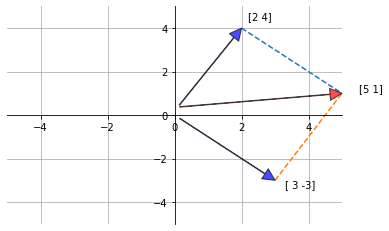

In [6]:
ax = move_spines()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()

vecs = [z1, z2] # lista de vectores
for v in vecs:
    vect_fig(v, "blue")
    
# Dibujamos el vector resultante
v = z1 + z2
vect_fig(v, "red")

ax.plot([z1[0], v[0]], [z1[1], v[1]], linestyle='--')
ax.plot([z2[0], v[0]], [z2[1], v[1]], linestyle='--' )

Que los vectores no estén centrados es por la función `spines` de matplotlib, hay que adjustar la escala y los límites de los axis para poder visualizarlo correctamente. Para el propósito de visualizar la __combinación lineal__ no es relevante.

## 4.3- Dependencia lineal de vectores

Dado un conjunto finito de vectores $x_1, x_2, ..., x_n$ se dice que los mismos son linealmente independientes, si y solo si, los únicos escalares $α_1, α_2,..., α_n$ que satisfacen la ecuación:

<center>$0 = \alpha_1 x_1 + ··· + \alpha_n x_n$</center>

son todos ceros, $α_1 = α_2 =... = α_n = 0$.

En caso de que no se cumpla, es decir, existe una solución a la ecuación anterior en la que no todos los escalares son ceros, a esta solución se llama no trivial y se dice que los vectores son __linealmente dependientes.__

In [ ]:
#2x + 3y |||| a*vector_1 + b*vector_2 = 0

<div class="alert alert-success">
    <b>Ejercicio:</b> Entonces, teniendo en cuenta lo anterior, supongamos que queremos determinar si los siguientes vectores son linealmente independientes</b>
    <p><center>$x_1 = [1.2, 1.1]$</center></p>
    <p><center>$x_2 = [-2.2, 1.4]$</center></p>
</div>

Para calcular si son linealmente independientes, debemos resolver el siguiente sistema de ecuaciones y verificar si la única solución es aquella en que los escalares sean ceros.<br><br>

<center>$\alpha_1[1.2, 1.1] + \alpha_2 [-2.2, 1.4] = 0$</center>

Vamos a ver dos formas de resolverlo.

#### Opción 1

Usando la librería `sympy`

In [7]:
import sympy as sp
import numpy as np

x = sp.Symbol('alpha1')
y = sp.Symbol('alpha2')

# Primeras componentes, segundas componentes
resultado = sp.solve([1.2*x - 2.2*y, 1.1*x + 1.4*y], [x, y])
resultado

{α₁: 0.0, α₂: 0.0}

#### Opción 2

Usando la función `solve` de `numpy`

In [9]:
A = np.array([[1.2, -2.2],
              [1.1, 1.4]])

b = np.array([0, 0])

x = np.linalg.solve(A, b)
x

array([0., 0.])

In [10]:
#AX = b

Como podemos ver por la solución numérica, estos vectores son linealmente independientes, ya que __la única solución a dicha ecuación, es aquella en que los escalares son cero.__

<div class="alert alert-success">
    <b>Ejercicio:</b> Determinemos ahora si por ejemplo, los siguientes vectores son linealmente independientes</b>
    <p><center>$x_1 = [3, 2, 2, 3]$</center></p>
    <p><center>$x_2 = [3, 2, 1, 2]$</center></p>
    <p><center>$x_3 = [3, 2, 0, 1]$</center></p>
</div>

La ecuación a resolver viene definida por: 
<center>$\alpha_1[3, 2, 2, 3] + \alpha_2 [3, 2, 1, 2] + \alpha_3 [3, 2, 0, 1] = 0$</center>

In [11]:
a1, a2, a3 = sp.symbols('a1, a2, a3')

A_matrix = sp.Matrix(((3, 3, 3, 0), (2, 2, 2, 0), (2, 1, 0, 0), (3, 2, 1, 0)))
print(A_matrix)

Matrix([[3, 3, 3, 0], [2, 2, 2, 0], [2, 1, 0, 0], [3, 2, 1, 0]])


In [12]:
sp.solve_linear_system(A_matrix, a1, a2, a3)

{a₁: a₃, a₂: -2⋅a₃}

In [24]:
a1 = 0
a3 = a1
a2 = -2*a3

print(a1, a2, a3)

0 0 0


Como vemos, esta solución es no trivial, ya que por ejemplo existe la solución $\alpha_1=1$, $\alpha_2=−2$, $\alpha_3=1$ en la que los escalares no son ceros. __Por lo tanto este sistema es linealmente dependiente.__

### 4.4- Espacio nulo

El término __espacio nulo__ es un término particularmente relacionado con la independencia lineal. El espacio nulo de una matriz $A$, expresado como $N(A)$, consiste en todas las soluciones a la ecuación $Ax=0$. 

Como os imaginaréis, una solución inmediata a esta ecuación es $x=0$, que establece la __independencia lineal.__ Esta solución solo va a ser la única que exista para los casos de __matrices invertibles.__ Pero en el caso de las __matrices singulares (aquellas que no son invertibles, que tienen determinante igual a cero)__, van a existir soluciones que no son cero para la ecuación $Ax=0$. __El conjunto de todas estas soluciones, va a representar el espacio nulo.__

<div class="alert alert-success">
    <b>NOTA:</b> Veremos más en profundidad sobre esto en el tema de los determinantes.
</div>

<div class="alert alert-success">
    <b>Ejercicio:</b> Encuentra el espacio nulo para la siguiente matriz:
    <p><center>$\begin{bmatrix}
                1 & 5 & 7\\
                0 & 0 & 9 
                \end{bmatrix}$</center></p>
</div>

Primero debemos definir la matriz en `sympy`

In [25]:
A = sp.Matrix(((1, 5, 7), (0, 0, 9)))

print(A)

Matrix([[1, 5, 7], [0, 0, 9]])


Calcular el espacio nulo es tan sencillo como usar `nullspace`

In [26]:
# Estamos buscando todos los valores de x que hacen esta ecuacion Ax=0

x = A.nullspace()
x

⎡⎡-5⎤⎤
⎢⎢  ⎥⎥
⎢⎢1 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣0 ⎦⎦

Es correcto?..Vamos a comprobarlo

In [27]:
A = np.array([[1, 5, 7], 
              [0, 0, 9]])

x = np.array([[-5], [1], [0]])

print(A.shape)
print(x.shape)

(2, 3)
(3, 1)


In [28]:
A.dot(x)

array([[0],
       [0]])

### 4.5- Espacio Columna y Espacio Fila 

El __espacio columna__, $C(A)$, consiste en todas las combinaciones lineales de las columnas de una matriz $A$. Estas combinaciones son los posibles vectores $Ax$. Este espacio es fundamental para resolver la ecuación $Ax=b$; el sistema $Ax=b$, va a tener solución solamente si $b$ esta en el espacio columna de $A$.

El otro espacio que conforma los espacios fundamentales de una matriz, es el __espacio fila__, el cual esta constituido por las combinaciones lineales de las filas de una matriz.

<div class="alert alert-success">
    <b>Ejercicio:</b> Obten el espacio columna y el espacio fila para la siguiente matriz:
    <p><center>$\begin{bmatrix}
                2 & -3 & -8 & 7\\
                -2 & -1 & 2 & -7\\
                1 & 0 & -3 & 6\\
                \end{bmatrix}$</center></p>
</div>

In [34]:
A = sp.Matrix([[2, -3, -8, 7],
              [-2, -1, 2, -7],
              [1, 0, -3, 6]])

# Reducimos y escalonamos la matriz
A.rref()

⎛⎡1  0  0  0 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  3 ⎥, (0, 1, 2)⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  1  -2⎦           ⎠

$[0, 1, 2]$ es la ubicación de las pivot. Las __pivot__ son los primeros elementos de cada fila cuyo valor es distinto de 0. Entraremos a tratarlo en profundidad en el tema de matrices.

In [35]:
# Espacio columna
for c in A.rref()[1]:
    print(A[:, c])

Matrix([[2], [-2], [1]])
Matrix([[-3], [-1], [0]])
Matrix([[-8], [2], [-3]])


In [37]:
[A[:, c] for c in A.rref()[1]]

⎡⎡2 ⎤  ⎡-3⎤  ⎡-8⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥, ⎢-1⎥, ⎢2 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣0 ⎦  ⎣-3⎦⎦

In [40]:
# Espacio fila

[A.rref()[0][r, :] for r in A.rref()[1]]

[[1  0  0  0], [0  1  0  3], [0  0  1  -2]]

### 4.6- Espacios Vectoriales en Machine Learning

Los espacios vectoriales se usan constantemente en Machine Learning, por ejemplo: __Word embeddings__. En ese caso estaríamos mapeando las palabras a vectores en un espacio vectorial/embedding space.

Hay que mencionar que no solo se puede mapear palabras/documentos a un espacio vectorial, podemos crear un espacio vectorial de cualquier cosa. 

Por ejemplo, imaginaos que tenemos una tienda de ropa, podríamos mapear los vestidos a un espacio vectorial de dimensiones __n__ y luego recomendarle a un cliente los vestidos más parecidos a los que a él le gusta (usando cosine similarity por ejemplo).

#### ¿A qué nos referimos con un espacio vectorial de dimensiones *n*?

Basicamente son features del modelo que estamos creando. Por ejemplo:

- Personas: edad, peso, altura, color del pelo, color de ojos, ...
- Casas: número de habitaciones, precio de venta, año de construcción, ...
- Coches: velocidad máxima, tiempo de aceleración, precio, ...

El número de dimensiones lo defines tú cuando estás creando el modelo.

<div class="alert alert-success">
    <b>Ejercicio:</b> Modela los siguientes modelos de coche en un espacio vectorial:
    

</div>


| Modelo | Precio | Velocidad Máxima | Tiempo de Aceleración |
| --- | --- | --- | --- |
| Porsche Taycan  | €110000 | 280 km/h | 3.8s |
| Tesla 3  | €90000 | 260 km/h | 3.5s |
| BMW i3  | €60000 | 160 km/h | 7s |

Para modelar estos coches a un espacio vectorial debemos crear los vectores correspondientes a cada uno de ellos. ¿Cómo serán dichos vectores si tenemos en cuenta que nuestro espacio vectorial va a ser de 3 dimensiones (precio, velocidad, aceleración)?<br><br>

<center>$taycan = (110000, 280, 3.8)$</center>
<center>$tesla = (90000, 260, 3.5)$</center>
<center>$i3 = (60000, 160, 7)$</center>

Vamos a graficar estos vectores en nuestro espacio vectorial y ver que sucede.

In [7]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

X = np.array([[110000, 280, 3.8],
              [90000, 260, 3.5],
              [60000, 160, 7]])

In [8]:
X.shape

(3, 3)

Definimos un nombre para cada vector para poder visualizarlos

/var/folders/zb/r_57byp97tx0mcljd3fd0_640000gn/T/ipykernel_4519/516813296.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'aceleracion')

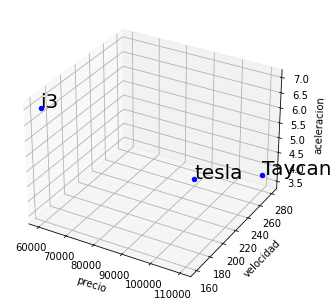

In [13]:
y = ['Taycan', 'tesla', 'i3']

fig = figure()
ax = Axes3D(fig)

for i in range(len(X)):
    ax.scatter(X[i, 0],
               X[i, 1],
               X[i, 2],
               color='b')
    
    ax.text(X[i, 0],
            X[i, 1],
            X[i, 2],
            f'{str(y[i])}',
            size = 20,
            zorder = 1,
            color = 'k')
    
ax.set_xlabel('precio')
ax.set_ylabel('velocidad')
ax.set_zlabel('aceleracion')


| Modelo | Precio | Velocidad Máxima | Tiempo de Aceleración | Techo Solar | Azul | Rojo | Verde |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Porsche Taycan  | €110000 | 280 km/h | 3.8s | 0 | 1 | 0 | 0 |
| Tesla 3  | €90000 | 260 km/h | 3.5s | 0 | 0 | 0 | 1 | 0 |
| BMW i3  | €60000 | 160 km/h | 7s | 1 | 0 | 1 | 0 | 1 |

Ya tenemos modelado nuestros coches a un espacio vectorial, en este caso un espacio vectorial de 3 dimensiones. 

#### ¿Qué sucede si tenemos más de 3 dimensiones?

He elegido modelas estos coches a un espacio vectorial de solo 3 dimensiones para poder representarlo graficamente. Normalmente, solemos tener miles de dimensiones/features, en concreto en NLP.

Cuando en el módulo de NLP veáis los __word embeddings__ (si!😄 soy un pesado con esto... pero es una herramienta super potente y que conviene conocer bien) veréis que se trata algunos modelos típicos como __Word2Vec__, __Glove__, __FastText__,... y que se menciona por ejemplo: "vectores de 100 dimensiones" o "vectores de 300 dimensiones". Dichas dimensiones hacen referencia a lo comentado anteriormente, al número de features que han elegido para modelarlos.

#### ¿Podemos medir la similaridad entre nuestros coches? Por supuesto!!!

Para ello, vamos a hacer uso de la librería de `sklearn` que tiene implementado internamente el `cosine similarity` (que nosotros implementamos en el módulo anterior).

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaler.fit(X) # Calcular media y varianza de nuestros datos por columna
#X_scaler = scaler.transform(X) 

X_scaler = scaler.fit_transform(X) 
print(X_scaler)
print('\n')

# Calcular similitud
similarities = cosine_similarity(X_scaler, X_scaler)
print(similarities)

[[ 1.13554995  0.88900089 -0.61028968]
 [ 0.16222142  0.50800051 -0.79968993]
 [-1.29777137 -1.3970014   1.40997962]]


[[ 1.          0.74666083 -0.96296773]
 [ 0.74666083  1.         -0.89836063]
 [-0.96296773 -0.89836063  1.        ]]


Vamos a visualizarlo en una tabla

 Modelos | Taycan | Tesla | i3
------ |------|------|------
Taycan | 1  | 0.746 | -0.962
Tesla | 0.746  | 1 | -0.898
i3 | -0.962  | -0.898 | 1

Podemos ver que los modelos `Taycan` y `Tesla` son más parecidos entre ellos y que poco tienen de similitud el `Taycan` o `Tesla` con el `i3`.